In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

### Para empezar, cargaremos los dos datasets. Uno hace referencia al sondeo de febrero y el otro al sondeo de abril

In [4]:
Febrer_2019 = pd.read_csv('EnquestesFebrer2019.csv', sep=';', header=0, encoding='latin-1')
Febrer_2019.head()

,REGISTRO,ENTREVISTADOR,FECHAINI,HORAINI,FECHAFIN,HORAFIN,DURACION,TELEFONO,ID_CONTACTO,ESTADO,...,PREFER_POLITIC,ID_IDEOLOGIA,IDEOLOGIA,ID_PERTINEN,PERTINEN,ID_ESTUDIS,ESTUDIS,ID_OCUPACIO,OCUPACIO,CP
0,4,"GUILLEM MILIAN, LAUREANO",2/13/2019,15:19:21,2/13/2019,16:30:57,389,698204715,4371986,Finalizada,...,Pablo Casado,3,Centro,5,Únicamente de su comunidad,2,Obligatorios,1,Trabajador,28053
1,5,"YUSTE ALARCON, MONTSERRAT",2/13/2019,15:19:42,2/13/2019,17:35:54,275,639346200,4372758,Finalizada,...,Albert Rivera,3,Centro,3,Tan español como de su comunidad,5,Universitarios,1,Trabajador,28017
2,6,"OVIEDO HEREDIA, THAIS",2/13/2019,15:20:04,2/13/2019,17:29:01,377,609722733,4367939,Finalizada,...,Ninguno de estos,98,No sabe,3,Tan español como de su comunidad,5,Universitarios,1,Trabajador,28043
3,27,"RIOS GONZALEZ, ANGEL",2/13/2019,15:25:19,2/13/2019,15:29:26,243,604021525,4370221,Finalizada,...,Pablo Casado,4,Centro derecha,3,Tan español como de su comunidad,4,Postobligatorios profesionales,1,Trabajador,36001
4,28,"YUSTE ALARCON, MONTSERRAT",2/13/2019,15:25:34,2/13/2019,15:32:08,392,640806079,4389758,Finalizada,...,Pedro Sánchez,3,Centro,5,Únicamente de su comunidad,2,Obligatorios,1,Trabajador,28021


In [5]:
Abril_2019 = pd.read_csv('EnquestesAbril2019.csv', sep=';', header=0, encoding='latin-1')
Abril_2019.head()

,ESTUDIO,ENTREVISTADOR,REGISTRO,FECHAINI,HORAINI,FECHAFIN,HORAFIN,DURACION,TELEFONO,ID_CONTACTO,...,PREFER_POLITIC,ID_IDEOLOGIA,IDEOLOGIA,ID_PERTINEN,PERTINEN,ID_ESTUDIS,ESTUDIS,ID_OCUPACIO,OCUPACIO,CP
0,1179_EPE_ABRIL,"ALCANTARA VAZQUEZ, ESTHER",62,04/01/2019,12:53:51,04/01/2019,18:07:30,351,616370419,4593749,...,Albert Rivera,3,Centro,3,Tan español como de su comunidad,5,Universitarios,1,Trabajador,23660
1,1179_EPE_ABRIL,"ALCANTARA VAZQUEZ, ESTHER",63,04/01/2019,12:53:58,04/01/2019,12:59:53,351,654848064,4643391,...,Pedro Sánchez,1,Izquierda,3,Tan español como de su comunidad,5,Universitarios,5,Parado,46730
2,1179_EPE_ABRIL,"PERALES MELUS, M. CARMEN",65,04/01/2019,12:54:23,04/01/2019,18:05:32,283,636314067,4598448,...,Albert Rivera,4,Centro derecha,3,Tan español como de su comunidad,5,Universitarios,1,Trabajador,28805
3,1179_EPE_ABRIL,"HERNANDEZ GOMEZ, SORAYA",70,04/01/2019,12:54:47,04/01/2019,12:59:13,260,626530536,4627226,...,Pablo Iglesias,1,Izquierda,98,No sabe,3,Postobligatorios,6,"Jubilado, pensionista",20302
4,1179_EPE_ABRIL,"GIRALDEZ PALACIOS, CRISTINA",82,04/01/2019,12:56:14,04/01/2019,13:00:39,259,649819027,4614667,...,Pablo Casado,4,Centro derecha,3,Tan español como de su comunidad,5,Universitarios,1,Trabajador,38007


### Vamos a inspeccionarlos un poco

In [6]:
Febrer_2019.index

RangeIndex(start=0, stop=1000, step=1)

In [7]:
Abril_2019.index

RangeIndex(start=0, stop=1000, step=1)

In [8]:
Febrer_2019.describe()

,REGISTRO,DURACION,TELEFONO,ID_CONTACTO,ID_AUT,ID_HABI,CMUNI,ID_SEXE,EDAT,ID_EDATCOD,...,ID_CONEIX_IGLESIAS,VAL_IGLESIAS,ID_CONEIX_ABASCAL,VAL_ABASCAL,ID_PREFER_POLITIC,ID_IDEOLOGIA,ID_PERTINEN,ID_ESTUDIS,ID_OCUPACIO,CP
count,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.00000,...,1000.000000,993.000000,1000.000000,871.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,3015.687000,313.529000,7.344907e+08,4.388783e+06,8.285000,2.37200,55923.007000,1.51000,50.390000,2.80300,...,1.007000,5.554884,1.129000,9.421355,24.323000,11.621000,6.44400,3.632000,3.440000,30956.864000
std,1938.960031,100.230461,1.389571e+08,1.210661e+04,4.712322,0.98009,47190.527603,0.50015,16.208227,1.03405,...,0.083414,14.260228,0.335368,24.347871,39.074538,28.111699,18.54278,1.283832,3.994541,23465.081219
min,4.000000,110.000000,6.002043e+08,4.367393e+06,1.000000,1.00000,1.000000,1.00000,18.000000,1.00000,...,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1004.000000
25%,1366.750000,251.000000,6.351688e+08,4.378338e+06,4.000000,2.00000,91.000000,1.00000,38.000000,2.00000,...,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000,2.00000,2.000000,1.000000,12455.000000
50%,2947.500000,291.000000,6.665123e+08,4.388836e+06,9.000000,2.00000,99995.000000,2.00000,50.000000,3.00000,...,1.000000,4.000000,1.000000,2.000000,4.000000,3.000000,3.00000,4.000000,1.000000,28310.000000
75%,4595.750000,351.250000,9.223462e+08,4.399754e+06,12.000000,3.00000,99995.000000,2.00000,62.000000,4.00000,...,1.000000,5.000000,1.000000,6.000000,14.000000,4.000000,3.00000,5.000000,6.000000,41013.000000
max,6974.000000,1205.000000,9.882715e+08,4.409255e+06,19.000000,4.00000,99995.000000,2.00000,94.000000,4.00000,...,2.000000,99.000000,2.000000,99.000000,99.000000,99.000000,99.00000,5.000000,99.000000,99999.000000


In [10]:
Abril_2019.describe()

,REGISTRO,DURACION,TELEFONO,ID_CONTACTO,ID_AUT,ID_HABI,CMUNI,ID_SEXE,EDAT,ID_EDATCOD,...,VAL_RIVERA,VAL_SANCHEZ,VAL_IGLESIAS,VAL_ABASCAL,ID_PREFER_POLITIC,ID_IDEOLOGIA,ID_PERTINEN,ID_ESTUDIS,ID_OCUPACIO,CP
count,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,989.000000,998.000000,995.000000,885.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4317.138000,347.596000,7.114492e+08,4.620349e+06,8.284000,2.349000,63933.233000,1.514000,49.764000,2.771000,...,8.037412,7.587174,7.278392,8.183051,20.997000,10.79800,6.726000,3.678000,3.457000,31416.353000
std,3418.627706,100.929885,1.256962e+08,1.658511e+04,4.702069,0.989028,38562.124797,0.500054,16.398391,1.040982,...,17.976864,16.472156,18.080634,22.693022,36.635299,27.04031,19.247321,3.287114,4.017747,24066.914162
min,62.000000,155.000000,6.000782e+08,4.592034e+06,1.000000,1.000000,1059.000000,1.000000,18.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1003.000000
25%,1313.500000,278.750000,6.309790e+08,4.606175e+06,4.000000,2.000000,28079.000000,1.000000,38.000000,2.000000,...,3.000000,3.000000,1.000000,0.000000,2.000000,1.00000,2.000000,2.000000,1.000000,13287.500000
50%,3122.500000,327.000000,6.588524e+08,4.620460e+06,9.000000,2.000000,99995.000000,2.000000,50.000000,3.000000,...,5.000000,5.000000,4.000000,2.000000,4.000000,2.00000,3.000000,4.000000,1.000000,28360.000000
75%,7888.750000,392.000000,6.923855e+08,4.634422e+06,12.000000,3.000000,99995.000000,2.000000,62.000000,4.000000,...,7.000000,7.000000,6.000000,5.000000,5.000000,4.00000,3.000000,5.000000,6.000000,41019.250000
max,10803.000000,1336.000000,9.884713e+08,4.649592e+06,19.000000,4.000000,99995.000000,2.000000,92.000000,4.000000,...,99.000000,99.000000,99.000000,99.000000,99.000000,99.00000,99.000000,99.000000,99.000000,99999.000000


In [11]:
Febrer_2019.dtypes

REGISTRO                int64
ENTREVISTADOR          object
FECHAINI               object
HORAINI                object
FECHAFIN               object
HORAFIN                object
DURACION                int64
TELEFONO                int64
ID_CONTACTO             int64
ESTADO                 object
TIP_TEL                object
CPROV                  object
ID_AUT                  int64
AUT                    object
ID_HABI                 int64
HABI                   object
CMUNI                   int64
NMUNI                  object
ID_SEXE                 int64
SEXE                   object
EDAT                    int64
ID_EDATCOD              int64
EDATCOD                object
ID_IMP_ELEC             int64
IMP_ELEC               object
ID_PROB_VOT_GEN         int64
PROB_VOT_GEN           object
ID_INT_GEN              int64
INT_GEN                object
ID_SIMP_GEN           float64
                       ...   
ID_INT_SIMP_GEN         int64
INT_SIMP_GEN           object
ID_REC_GEN

In [12]:
Abril_2019.dtypes

ESTUDIO                object
ENTREVISTADOR          object
REGISTRO                int64
FECHAINI               object
HORAINI                object
FECHAFIN               object
HORAFIN                object
DURACION                int64
TELEFONO                int64
ID_CONTACTO             int64
ESTADO                 object
TIP_TEL                object
ID_AUT                  int64
AUT                    object
ID_HABI                 int64
HABI                   object
CMUNI                   int64
ID_SEXE                 int64
SEXE                   object
EDAT                    int64
ID_EDATCOD              int64
EDATCOD                object
ID_IMP_ELEC             int64
IMP_ELEC               object
ID_PROB_VOT_GEN         int64
PROB_VOT_GEN           object
ID_INT_GEN              int64
INT_GEN                object
ID_SIMP_GEN           float64
SIMP_GEN               object
ID_INT_SIMP_GEN         int64
INT_SIMP_GEN           object
ID_REC_GEN              int64
REC_GEN   

### Nos interesa unir los dos datasets, y para ello, lo primero que haremos será eliminar las columnas que no nos interesan de ambos datasets

In [13]:
Febrer_2019.columns

Index(['REGISTRO', 'ENTREVISTADOR', 'FECHAINI', 'HORAINI', 'FECHAFIN',
       'HORAFIN', 'DURACION', 'TELEFONO', 'ID_CONTACTO', 'ESTADO', 'TIP_TEL',
       'CPROV', 'ID_AUT', 'AUT', 'ID_HABI', 'HABI', 'CMUNI', 'NMUNI',
       'ID_SEXE', 'SEXE', 'EDAT', 'ID_EDATCOD', 'EDATCOD', 'ID_IMP_ELEC',
       'IMP_ELEC', 'ID_PROB_VOT_GEN', 'PROB_VOT_GEN', 'ID_INT_GEN', 'INT_GEN',
       'ID_SIMP_GEN', 'SIMP_GEN', 'ID_INT_SIMP_GEN', 'INT_SIMP_GEN',
       'ID_REC_GEN', 'REC_GEN', 'ID_CONEIX_CASADO', 'CONEIX_CASADO',
       'VAL_CASADO', 'ID_CONEIX_RIVERA', 'CONEIX_RIVERA', 'VAL_RIVERA',
       'ID_CONEIX_SANCHEZ', 'CONEIX_SANCHEZ', 'VAL_SANCHEZ',
       'ID_CONEIX_IGLESIAS', 'CONEIX_IGLESIAS', 'VAL_IGLESIAS',
       'ID_CONEIX_ABASCAL', 'CONEIX_ABASCAL', 'VAL_ABASCAL',
       'ID_PREFER_POLITIC', 'PREFER_POLITIC', 'ID_IDEOLOGIA', 'IDEOLOGIA',
       'ID_PERTINEN', 'PERTINEN', 'ID_ESTUDIS', 'ESTUDIS', 'ID_OCUPACIO',
       'OCUPACIO', 'CP'],
      dtype='object')

In [14]:
Abril_2019.columns

Index(['ESTUDIO', 'ENTREVISTADOR', 'REGISTRO', 'FECHAINI', 'HORAINI',
       'FECHAFIN', 'HORAFIN', 'DURACION', 'TELEFONO', 'ID_CONTACTO', 'ESTADO',
       'TIP_TEL', 'ID_AUT', 'AUT', 'ID_HABI', 'HABI', 'CMUNI', 'ID_SEXE',
       'SEXE', 'EDAT', 'ID_EDATCOD', 'EDATCOD', 'ID_IMP_ELEC', 'IMP_ELEC',
       'ID_PROB_VOT_GEN', 'PROB_VOT_GEN', 'ID_INT_GEN', 'INT_GEN',
       'ID_SIMP_GEN', 'SIMP_GEN', 'ID_INT_SIMP_GEN', 'INT_SIMP_GEN',
       'ID_REC_GEN', 'REC_GEN', 'ID_CONEIX_CASADO', 'CONEIX_CASADO',
       'ID_CONEIX_RIVERA', 'CONEIX_RIVERA', 'ID_CONEIX_SANCHEZ',
       'CONEIX_SANCHEZ', 'ID_CONEIX_IGLESIAS', 'CONEIX_IGLESIAS',
       'ID_CONEIX_ABASCAL', 'CONEIX_ABASCAL', 'VAL_CASADO', 'VAL_RIVERA',
       'VAL_SANCHEZ', 'VAL_IGLESIAS', 'VAL_ABASCAL', 'ID_PREFER_POLITIC',
       'PREFER_POLITIC', 'ID_IDEOLOGIA', 'IDEOLOGIA', 'ID_PERTINEN',
       'PERTINEN', 'ID_ESTUDIS', 'ESTUDIS', 'ID_OCUPACIO', 'OCUPACIO', 'CP'],
      dtype='object')

In [15]:
Febrer_2019.shape

(1000, 61)

In [16]:
Abril_2019.shape

(1000, 60)

In [17]:
Febrer_2019.drop(['ENTREVISTADOR', 'FECHAINI', 'HORAINI', 'FECHAFIN', 'HORAFIN', 'DURACION',
                'TELEFONO', 'ESTADO', 'NMUNI', 'CPROV'], axis='columns', inplace=True)
Abril_2019.drop(['ESTUDIO', 'ENTREVISTADOR', 'FECHAINI', 'HORAINI', 'FECHAFIN', 'HORAFIN', 'DURACION',
                'TELEFONO', 'ESTADO'], axis='columns', inplace=True)

In [18]:
Febrer_2019.shape

(1000, 51)

In [19]:
Abril_2019.shape

(1000, 51)

### Unimos los dos dataSets

In [20]:
Dades_2019 = Febrer_2019.append(Abril_2019)

C:\Users\Lau\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [21]:
Dades_2019.shape

(2000, 51)

In [22]:
Dades_2019.head()

,AUT,CMUNI,CONEIX_ABASCAL,CONEIX_CASADO,CONEIX_IGLESIAS,CONEIX_RIVERA,CONEIX_SANCHEZ,CP,EDAT,EDATCOD,...,REC_GEN,REGISTRO,SEXE,SIMP_GEN,TIP_TEL,VAL_ABASCAL,VAL_CASADO,VAL_IGLESIAS,VAL_RIVERA,VAL_SANCHEZ
0,"Madrid, Comunidad de",28079,Sí,Sí,Sí,Sí,Sí,28053,29,De 18 a 29 años,...,PP,4,Mujer,PP,Móviles aleatorios,4.0,3.0,0.0,5.0,1.0
1,"Madrid, Comunidad de",28079,Sí,Sí,Sí,Sí,Sí,28017,41,De 30 a 44 años,...,C's,5,Mujer,C's,Móviles aleatorios,0.0,1.0,3.0,4.0,4.0
2,"Madrid, Comunidad de",28079,Sí,Sí,Sí,Sí,Sí,28043,50,De 45 a 59 años,...,No votó,6,Hombre,Ninguno,Móviles aleatorios,5.0,5.0,5.0,98.0,5.0
3,Galicia,99995,Sí,Sí,Sí,Sí,Sí,36001,46,De 45 a 59 años,...,PP,27,Mujer,,Móviles aleatorios,2.0,7.0,0.0,5.0,0.0
4,"Madrid, Comunidad de",28079,Sí,Sí,Sí,No,Sí,28021,48,De 45 a 59 años,...,No votó,28,Hombre,,Móviles aleatorios,4.0,5.0,5.0,NaN,10.0


### Sabemos que en las variables de valoración los 98 son No sabe y los 99 son No contesta. Vamos a tratar estos casos. 

### En realidad no nos interesa saber qué registros tienen 98 o 99, sino simplemente saber si hay alguno para aplicar algun método.

In [23]:
(Dades_2019['VAL_CASADO']).isin([98, 99]).any()

True

In [24]:
Dades_2019['VAL_CASADO'].describe()

count    1951.000000
mean        7.656074
std        19.074620
min         0.000000
25%         1.000000
50%         4.000000
75%         6.000000
max        99.000000
Name: VAL_CASADO, dtype: float64

In [25]:
(Dades_2019['VAL_CASADO'])[::1]

0       3.0
1       1.0
2       5.0
3       7.0
4       5.0
5       7.0
6       1.0
7       9.0
8       0.0
9       NaN
10      6.0
11      NaN
12      5.0
13      NaN
14      8.0
15      0.0
16      6.0
17      0.0
18      7.0
19      9.0
20      0.0
21      2.0
22      4.0
23      0.0
24      4.0
25      6.0
26     98.0
27     10.0
28      7.0
29      0.0
       ... 
970    10.0
971     8.0
972     9.0
973     8.0
974     0.0
975     2.0
976     2.0
977    10.0
978     0.0
979     2.0
980     8.0
981     0.0
982     4.0
983     0.0
984     5.0
985     1.0
986     3.0
987     8.0
988     4.0
989    98.0
990     1.0
991     8.0
992     7.0
993     2.0
994     NaN
995     0.0
996     5.0
997     2.0
998     0.0
999     0.0
Name: VAL_CASADO, Length: 2000, dtype: float64

### A aquellos casos donde haya 98 o 99 les pondremos el valor de la media total por columna.

In [26]:
Dades_2019.VAL_CASADO = np.where(Dades_2019.VAL_CASADO.isin([98, 99]), Dades_2019.VAL_CASADO.mean(), Dades_2019.VAL_CASADO)

In [27]:
(Dades_2019['VAL_CASADO'])[::1]

0       3.000000
1       1.000000
2       5.000000
3       7.000000
4       5.000000
5       7.000000
6       1.000000
7       9.000000
8       0.000000
9            NaN
10      6.000000
11           NaN
12      5.000000
13           NaN
14      8.000000
15      0.000000
16      6.000000
17      0.000000
18      7.000000
19      9.000000
20      0.000000
21      2.000000
22      4.000000
23      0.000000
24      4.000000
25      6.000000
26      7.656074
27     10.000000
28      7.000000
29      0.000000
         ...    
970    10.000000
971     8.000000
972     9.000000
973     8.000000
974     0.000000
975     2.000000
976     2.000000
977    10.000000
978     0.000000
979     2.000000
980     8.000000
981     0.000000
982     4.000000
983     0.000000
984     5.000000
985     1.000000
986     3.000000
987     8.000000
988     4.000000
989     7.656074
990     1.000000
991     8.000000
992     7.000000
993     2.000000
994          NaN
995     0.000000
996     5.000000
997     2.0000

### Hagamos lo mismo con el resto de valoraciones de políticos

In [29]:
Dades_2019.VAL_RIVERA = np.where(Dades_2019.VAL_RIVERA.isin([98, 99]), Dades_2019.VAL_RIVERA.mean(), Dades_2019.VAL_RIVERA)
Dades_2019.VAL_SANCHEZ = np.where(Dades_2019.VAL_SANCHEZ.isin([98, 99]), Dades_2019.VAL_SANCHEZ.mean(), Dades_2019.VAL_SANCHEZ)
Dades_2019.VAL_IGLESIAS = np.where(Dades_2019.VAL_IGLESIAS.isin([98, 99]), Dades_2019.VAL_IGLESIAS.mean(), Dades_2019.VAL_IGLESIAS)
Dades_2019.VAL_ABASCAL = np.where(Dades_2019.VAL_ABASCAL.isin([98, 99]), Dades_2019.VAL_ABASCAL.mean(), Dades_2019.VAL_ABASCAL)

### Veamos si a parte de 98 y 99 tenemos nulos

In [30]:
Dades_2019.isnull().sum(axis=0)

AUT                      0
CMUNI                    0
CONEIX_ABASCAL           0
CONEIX_CASADO            0
CONEIX_IGLESIAS          0
CONEIX_RIVERA            0
CONEIX_SANCHEZ           0
CP                       0
EDAT                     0
EDATCOD                  0
ESTUDIS                  0
HABI                     0
IDEOLOGIA                0
ID_AUT                   0
ID_CONEIX_ABASCAL        0
ID_CONEIX_CASADO         0
ID_CONEIX_IGLESIAS       0
ID_CONEIX_RIVERA         0
ID_CONEIX_SANCHEZ        0
ID_CONTACTO              0
ID_EDATCOD               0
ID_ESTUDIS               0
ID_HABI                  0
ID_IDEOLOGIA             0
ID_IMP_ELEC              0
ID_INT_GEN               0
ID_INT_SIMP_GEN          0
ID_OCUPACIO              0
ID_PERTINEN              0
ID_PREFER_POLITIC        0
ID_PROB_VOT_GEN          0
ID_REC_GEN               0
ID_SEXE                  0
ID_SIMP_GEN           1287
IMP_ELEC                 0
INT_GEN                  0
INT_SIMP_GEN             0
O

### Vemos que también tenemos valores nulos en estas preguntas de valoración de los políticos, así que los quitamos también de la misma manera

In [31]:
Dades_2019.VAL_CASADO = np.where(Dades_2019.VAL_CASADO.isnull(), Dades_2019.VAL_CASADO.mean(), Dades_2019.VAL_CASADO)
Dades_2019.VAL_RIVERA = np.where(Dades_2019.VAL_RIVERA.isnull(), Dades_2019.VAL_RIVERA.mean(), Dades_2019.VAL_RIVERA)
Dades_2019.VAL_SANCHEZ = np.where(Dades_2019.VAL_SANCHEZ.isnull(), Dades_2019.VAL_SANCHEZ.mean(), Dades_2019.VAL_SANCHEZ)
Dades_2019.VAL_IGLESIAS = np.where(Dades_2019.VAL_IGLESIAS.isnull(), Dades_2019.VAL_IGLESIAS.mean(), Dades_2019.VAL_IGLESIAS)
Dades_2019.VAL_ABASCAL = np.where(Dades_2019.VAL_ABASCAL.isnull(), Dades_2019.VAL_ABASCAL.mean(), Dades_2019.VAL_ABASCAL)

In [32]:
Dades_2019.isnull().sum(axis=0)

AUT                      0
CMUNI                    0
CONEIX_ABASCAL           0
CONEIX_CASADO            0
CONEIX_IGLESIAS          0
CONEIX_RIVERA            0
CONEIX_SANCHEZ           0
CP                       0
EDAT                     0
EDATCOD                  0
ESTUDIS                  0
HABI                     0
IDEOLOGIA                0
ID_AUT                   0
ID_CONEIX_ABASCAL        0
ID_CONEIX_CASADO         0
ID_CONEIX_IGLESIAS       0
ID_CONEIX_RIVERA         0
ID_CONEIX_SANCHEZ        0
ID_CONTACTO              0
ID_EDATCOD               0
ID_ESTUDIS               0
ID_HABI                  0
ID_IDEOLOGIA             0
ID_IMP_ELEC              0
ID_INT_GEN               0
ID_INT_SIMP_GEN          0
ID_OCUPACIO              0
ID_PERTINEN              0
ID_PREFER_POLITIC        0
ID_PROB_VOT_GEN          0
ID_REC_GEN               0
ID_SEXE                  0
ID_SIMP_GEN           1287
IMP_ELEC                 0
INT_GEN                  0
INT_SIMP_GEN             0
O

### Guardamos el dataset

In [33]:
Dades_2019.to_csv('Enquestes2019.csv', sep=';', header=1, encoding='latin-1')

### Para poder analizar los datos; tratemos también los 98, 99 y nulos de los datasets de febrero y de abril

In [55]:
Febrer_2019.VAL_CASADO = np.where(Febrer_2019.VAL_CASADO.isin([98, 99]), Febrer_2019.VAL_CASADO.mean(), Febrer_2019.VAL_CASADO)
Febrer_2019.VAL_RIVERA = np.where(Febrer_2019.VAL_RIVERA.isin([98, 99]), Febrer_2019.VAL_RIVERA.mean(), Febrer_2019.VAL_RIVERA)
Febrer_2019.VAL_SANCHEZ = np.where(Febrer_2019.VAL_SANCHEZ.isin([98, 99]), Febrer_2019.VAL_SANCHEZ.mean(), Febrer_2019.VAL_SANCHEZ)
Febrer_2019.VAL_IGLESIAS = np.where(Febrer_2019.VAL_IGLESIAS.isin([98, 99]), Febrer_2019.VAL_IGLESIAS.mean(), Febrer_2019.VAL_IGLESIAS)
Febrer_2019.VAL_ABASCAL = np.where(Febrer_2019.VAL_ABASCAL.isin([98, 99]), Febrer_2019.VAL_ABASCAL.mean(), Febrer_2019.VAL_ABASCAL)

In [72]:
Febrer_2019.VAL_CASADO = np.where(Febrer_2019.VAL_CASADO.isnull(), Febrer_2019.VAL_CASADO.mean(), Febrer_2019.VAL_CASADO)
Febrer_2019.VAL_RIVERA = np.where(Febrer_2019.VAL_RIVERA.isnull(), Febrer_2019.VAL_RIVERA.mean(), Febrer_2019.VAL_RIVERA)
Febrer_2019.VAL_SANCHEZ = np.where(Febrer_2019.VAL_SANCHEZ.isnull(), Febrer_2019.VAL_SANCHEZ.mean(), Febrer_2019.VAL_SANCHEZ)
Febrer_2019.VAL_IGLESIAS = np.where(Febrer_2019.VAL_IGLESIAS.isnull(), Febrer_2019.VAL_IGLESIAS.mean(), Febrer_2019.VAL_IGLESIAS)
Febrer_2019.VAL_ABASCAL = np.where(Febrer_2019.VAL_ABASCAL.isnull(), Febrer_2019.VAL_ABASCAL.mean(), Febrer_2019.VAL_ABASCAL)

In [73]:
Abril_2019.VAL_CASADO = np.where(Abril_2019.VAL_CASADO.isin([98, 99]), Abril_2019.VAL_CASADO.mean(), Abril_2019.VAL_CASADO)
Abril_2019.VAL_RIVERA = np.where(Abril_2019.VAL_RIVERA.isin([98, 99]), Abril_2019.VAL_RIVERA.mean(), Abril_2019.VAL_RIVERA)
Abril_2019.VAL_SANCHEZ = np.where(Abril_2019.VAL_SANCHEZ.isin([98, 99]), Abril_2019.VAL_SANCHEZ.mean(), Abril_2019.VAL_SANCHEZ)
Abril_2019.VAL_IGLESIAS = np.where(Abril_2019.VAL_IGLESIAS.isin([98, 99]), Abril_2019.VAL_IGLESIAS.mean(), Abril_2019.VAL_IGLESIAS)
Abril_2019.VAL_ABASCAL = np.where(Abril_2019.VAL_ABASCAL.isin([98, 99]), Abril_2019.VAL_ABASCAL.mean(), Abril_2019.VAL_ABASCAL)

In [56]:
Abril_2019.VAL_CASADO = np.where(Abril_2019.VAL_CASADO.isnull(), Abril_2019.VAL_CASADO.mean(), Abril_2019.VAL_CASADO)
Abril_2019.VAL_RIVERA = np.where(Abril_2019.VAL_RIVERA.isnull(), Abril_2019.VAL_RIVERA.mean(), Abril_2019.VAL_RIVERA)
Abril_2019.VAL_SANCHEZ = np.where(Abril_2019.VAL_SANCHEZ.isnull(), Abril_2019.VAL_SANCHEZ.mean(), Abril_2019.VAL_SANCHEZ)
Abril_2019.VAL_IGLESIAS = np.where(Abril_2019.VAL_IGLESIAS.isnull(), Abril_2019.VAL_IGLESIAS.mean(), Abril_2019.VAL_IGLESIAS)
Abril_2019.VAL_ABASCAL = np.where(Abril_2019.VAL_ABASCAL.isnull(), Abril_2019.VAL_ABASCAL.mean(), Abril_2019.VAL_ABASCAL)

### Vamos a observar un poco los datasets y a analizar los datos

### Empezaremos mirando las valoraciones de los políticos

In [74]:
Febrer_2019.VAL_CASADO.mean()

3.762134126899778

In [75]:
Abril_2019.VAL_CASADO.mean()

4.1082426095820574

In [76]:
Dades_2019.VAL_CASADO.mean()

3.894485893630232

In [77]:
Febrer_2019.VAL_RIVERA.mean()

4.245848205433278

In [78]:
Abril_2019.VAL_RIVERA.mean()

4.701795753286146

In [79]:
Dades_2019.VAL_RIVERA.mean()

4.454059863915515

In [80]:
Febrer_2019.VAL_SANCHEZ.mean()

4.216474732991251

In [81]:
Abril_2019.VAL_SANCHEZ.mean()

4.7773767535070135

In [82]:
Dades_2019.VAL_SANCHEZ.mean()

4.491930685211595

In [83]:
Febrer_2019.VAL_IGLESIAS.mean()

3.495677192512744

In [84]:
Abril_2019.VAL_IGLESIAS.mean()

3.912692462311561

In [85]:
Dades_2019.VAL_IGLESIAS.mean()

3.689453117092897

In [86]:
Febrer_2019.VAL_ABASCAL.mean()

3.3045709367144585

In [87]:
Abril_2019.VAL_ABASCAL.mean()

3.500569491525433

In [88]:
Dades_2019.VAL_ABASCAL.mean()

3.0935614178008586

#### En cuanto a los candidatos, Pedro Sánchez se mantiene como el mejor valorado, por delante de Albert Rivera. Todos han mejorado su nota de febrero a abril.

### Veamos ahora qué pasa con el político que los electorales prefieren como presidente

In [92]:
Febrer_2019.PREFER_POLITIC.value_counts()

Pedro Sánchez       294
Albert Rivera       179
Ninguno de estos    151
Pablo Casado        143
Pablo Iglesias      109
Santiago Abascal     53
No sabe              40
No contesta          17
Indiferente           9
Otro                  5
Name: PREFER_POLITIC, dtype: int64

In [93]:
Abril_2019.PREFER_POLITIC.value_counts()

Pedro Sánchez       314
Albert Rivera       198
Pablo Iglesias      134
Pablo Casado        120
Ninguno de estos     92
No sabe              69
Santiago Abascal     48
No contesta          11
Indiferente          10
Otro                  4
Name: PREFER_POLITIC, dtype: int64

In [94]:
Dades_2019.PREFER_POLITIC.value_counts()

Pedro Sánchez       608
Albert Rivera       377
Pablo Casado        263
Ninguno de estos    243
Pablo Iglesias      243
No sabe             109
Santiago Abascal    101
No contesta          28
Indiferente          19
Otro                  9
Name: PREFER_POLITIC, dtype: int64

#### En preferencias a presidente, Sánchez continua por delante, mejorando su registro de febrero a abril. Albert Rivera i Pablo Iglesias, segundo y tercero, también mejoran sus datos en este indicador, al contrario que Pablo Casado i Santiago Abascal.

### Y para finalizar, observemos la intención de voto de las elecciones generales

In [96]:
Febrer_2019.INT_GEN.value_counts()

PSOE                        213
No sabe                     167
PP                          116
C's                          95
Vox                          88
No contesta                  83
No votaría                   56
Unidos Podemos               47
ERC                          45
En blanco                    16
En Comú Podem                13
Otro partido                 12
Compromís + Podemos + IU     10
Nulo                         10
En marea                      8
PNV                           8
EH Bildu                      6
PDECat                        6
CC                            1
Name: INT_GEN, dtype: int64

In [97]:
Abril_2019.INT_GEN.value_counts()

No sabe            261
PSOE               203
PP                 101
C's                 90
Vox                 68
Unidas Podemos      67
No contesta         48
No votaría          45
ERC                 34
En blanco           18
PNV                 12
En Comú Podem       10
EH Bildu             9
Nulo                 9
Otro partido         7
PACMA                6
JxCat                6
Front Republicà      3
Compromís            2
CC                   1
Name: INT_GEN, dtype: int64

In [98]:
Dades_2019.INT_GEN.value_counts()

No sabe                     428
PSOE                        416
PP                          217
C's                         185
Vox                         156
No contesta                 131
No votaría                  101
ERC                          79
Unidas Podemos               67
Unidos Podemos               47
En blanco                    34
En Comú Podem                23
PNV                          20
Nulo                         19
Otro partido                 19
EH Bildu                     15
Compromís + Podemos + IU     10
En marea                      8
JxCat                         6
PDECat                        6
PACMA                         6
Front Republicà               3
Compromís                     2
CC                            2
Name: INT_GEN, dtype: int64

####  Y centrándonos en la intención de voto, la estimación dibuja un escenario muy favorable para el PSOE que, según los sondeos, ganaría las elecciones con un 30% de los votos. En segunda posición quedaría el PP. C's mejoraría ligeramente sus resultados de 2016, quedando en tercera posición. Vox entraría en el congreso gracias a los votos provinentes del PP, C's y la abstención, pero pierde fuerza de febrero a abril.

### GRÁFICOS

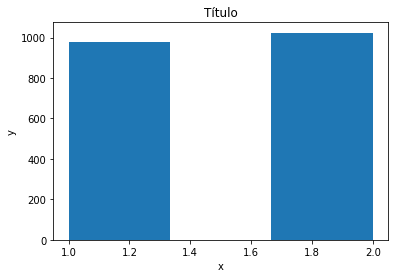

In [99]:
plt.hist(Dades_2019['ID_SEXE'], bins=max(Dades_2019['ID_SEXE']) +1)
plt.title('Título')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

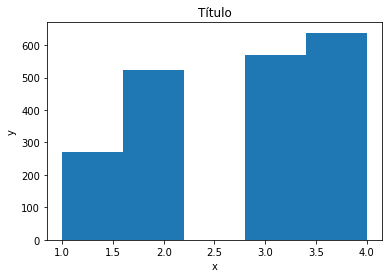

In [100]:
plt.hist(Dades_2019['ID_EDATCOD'], bins=max(Dades_2019['ID_EDATCOD']) +1)
plt.title('Título')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Haremos una visualización más detallada con tableau